In [9]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import *
from matplotlib import colors
from matplotlib.colors import ListedColormap
from argparse import Namespace


In [10]:
conf = !python  parameters.py

In [11]:
configs = eval(conf[0])
configs.et_normalize_coef_cost

100

In [12]:
# df = pd.read_pickle('logs/log_rnd_alloc_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')
df = pd.read_pickle('logs/log_ga_pf_'  + str(configs.name) + "_" + str(configs.n_jobs) + '_' + str(configs.n_devices)+'.pkl', 'infer')


In [13]:
df

[[0, 33.75, 9.0, 4.645036935806274],
 [1, 23.916667938232422, 9.0, 5.3481059074401855],
 [2, 25.5, 9.0, 5.305546998977661],
 [3, 71.0, 9.0, 3.4574756622314453],
 [3, 70.83332824707031, 23.0, 3.4574756622314453],
 [3, 49.58333206176758, 74.0, 3.4574756622314453],
 [3, 68.75, 51.0, 3.4574756622314453],
 [3, 47.75, 79.0, 3.4574756622314453],
 [3, 49.58333206176758, 74.0, 3.4574756622314453],
 [3, 52.58333206176758, 64.0, 3.4574756622314453],
 [3, 46.25, 93.0, 3.4574756622314453],
 [3, 71.0, 9.0, 3.4574756622314453],
 [3, 50.75, 69.0, 3.4574756622314453],
 [3, 54.75, 59.0, 3.4574756622314453],
 [3, 27.249998092651367, 120.0, 3.4574756622314453],
 [3, 32.416664123535156, 105.0, 3.4574756622314453],
 [3, 34.75, 95.0, 3.4574756622314453],
 [3, 32.58333206176758, 100.0, 3.4574756622314453],
 [3, 70.58332824707031, 46.0, 3.4574756622314453],
 [3, 30.583332061767578, 110.0, 3.4574756622314453],
 [3, 28.749998092651367, 115.0, 3.4574756622314453],
 [3, 46.25, 93.0, 3.4574756622314453],
 [3, 25.83

In [14]:
episode, time, cost, exec_time = [],[],[],[]
for x in range(len(df)):
    episode.append(df[x][0])
    time.append(df[x][1])
    cost.append(df[x][2])
    exec_time.append(df[x][3])
episode = np.array(episode)
ftime = np.array(time)
fcost = np.array(cost)
exec_time = np.array(exec_time)
ftime.shape


(190,)

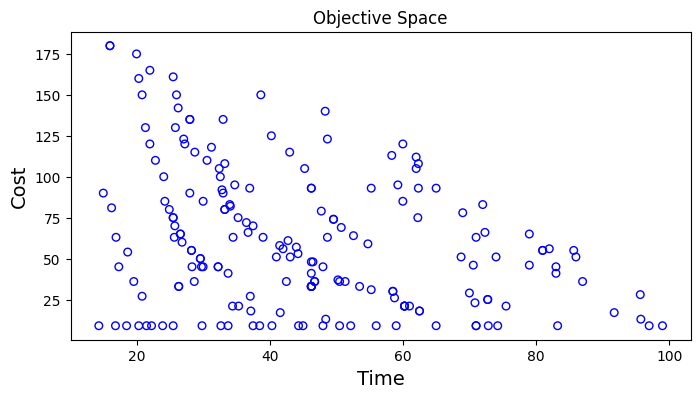

In [15]:
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(ftime, fcost, s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.xlabel("Time", fontsize=14)
plt.ylabel("Cost", fontsize=14)
# plt.savefig("images/pf_nsgaII-0.pdf",dpi=300,bbox_inches = 'tight')
plt.show()